In [1]:
%%capture
!wget https://raw.githubusercontent.com/shitkov/signature_detector/main/yolo_v5s_640p_1k.pt
!wget https://raw.githubusercontent.com/shitkov/signature_detector/main/test_multi.jpg
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!wget https://raw.githubusercontent.com/shitkov/signature_detector/main/predict.py
!wget https://github.com/shitkov/signature_detector/raw/main/helpers.py
%pip install -qr requirements.txt

#RESTART RUNTIME!

In [1]:
%cd yolov5
from predict import predict
from helpers import draw_bboxs, resizer

/content/yolov5


  0%|          | 0.00/755k [00:00<?, ?B/s]

In [2]:
import PIL
from PIL import Image

In [3]:
weights = '/content/yolo_v5s_640p_1k.pt'
image_path = '/content/test_multi.jpg'
resized_image_save_path = '/content/resized_image.jpg'
bboxs_image_save_path = '/content/predicted_bboxs.jpg'
size = 1280

In [4]:
image = Image.open(image_path)

In [5]:
resized_image_gray = resizer(
    image=image,
    fixed_size=size,
    grayscale=True
)

In [6]:
resized_image_gray.save(resized_image_save_path, optimize=True, quality=100)

In [7]:
pred_list = predict(
    weights=weights,
    source=resized_image_save_path,
    imgsz=[1280, 1280]
)

In [8]:
image = draw_bboxs(resized_image_gray, pred_list)

In [9]:
image.save(bboxs_image_save_path, optimize=True, quality=100)

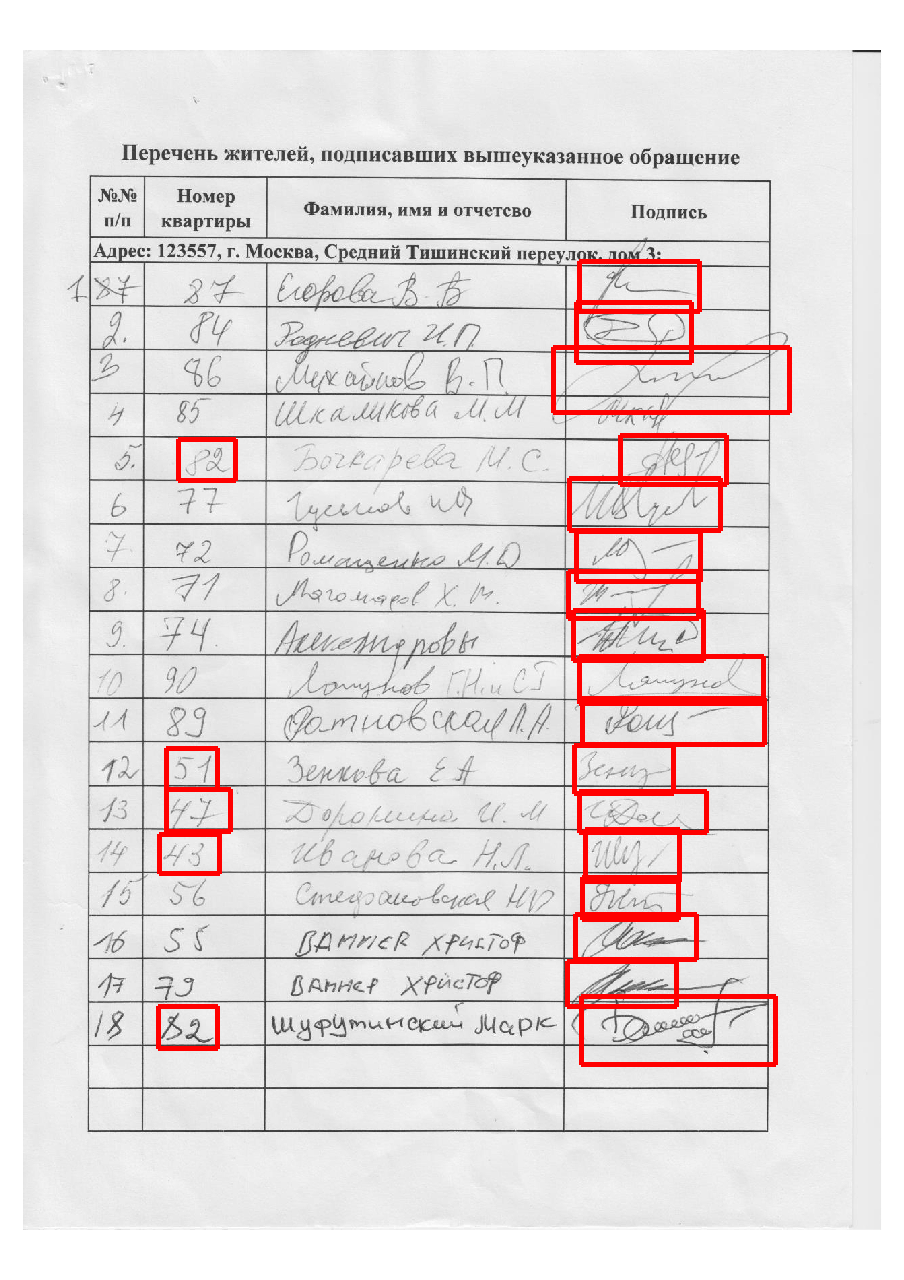

In [10]:
image